In [1]:
from os import mkdir
import shutil
import pandas as pd

In [2]:
from os import listdir
from os.path import isfile, join

In [3]:
mypath = './LORE/factual-results/'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f)) and f.endswith('.csv')]

all_df = []
cols = ['fidelity', 'hit', 'k_fid_3', 'k_fid_5', 'k_fid_7', 'perf']

for file in onlyfiles:
    df = pd.read_csv(mypath + file, header=None, names=cols)
    ds, db, idx, algo = file[:-4].split('_')[2:6]
    df['ds'], df['bb'], df['idx'], df['algo'] = ds, db, idx, algo

    all_df.append(df)


In [4]:
mypath = './factual-flare-results/'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f)) and f.endswith('.csv')]

for file in onlyfiles:
    df = pd.read_csv(mypath + file, header=None, names=cols)
    ds, db, idx, neigh, algo = file[:-4].split('_')[2:]
    df['ds'], df['bb'], df['idx'], df['algo'] = ds, db, idx, f'{algo}_{neigh}'

    all_df.append(df)

In [5]:
# mypath = './factual-neighrange-search-trampa/'
# onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

# for file in onlyfiles:
#     df = pd.read_csv(mypath + file, header=None, names=cols)
#     ds, db, idx, neigh, algo = file[:-4].split('_')[2:]
#     df['ds'], df['bb'], df['idx'], df['algo'] = ds, db, idx, f'{algo}_{neigh}_trampa'

#     all_df.append(df)

In [6]:
# broken_records =set([
#     ('fico', 3005),
#     ('compas', 502),
#     ('german', 102),
#     ('german', 270),
#     ('german', 130),
#     ('german',  20),
#     ('german', 270),
#     ('german', 214),
#     ('german', 189),
#     ('german',  52),
#     ('german', 251),
#     ('german', 187),
#     ('german',  80),
#     ('german',  40),
#     ('german', 134),
#     ('german',  34),
# ])

# mypath = './factual-neighrange-search/'
# onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

# for file in onlyfiles:
#     # df = pd.read_csv(mypath + file, header=None, names=cols)

#     ds, db, idx, neigh, algo = file[:-4].split('_')[2:]
#     if (ds, int(idx)) in broken_records:
#         print(file)
#         with open(mypath + file, 'r') as f:
#             lines = f.readlines()
#             broken = lines[0].split(',')[5]
#             fixed = broken.split('.')[0] + '.' + broken.split('.')[1][:-1] + '\n' + broken.split('.')[1][-1] + '.' + broken.split('.')[2]
#             records = lines[0].split(',')
#             records[5] = fixed
#         with open(mypath + file, 'w') as f:
#             f.write(','.join(records))
    # df['ds'], df['bb'], df['idx'], df['algo'] = ds, db, idx, f'{algo}_{neigh}'

In [7]:
df = pd.concat(all_df)


In [8]:
# Plot the fidelity of the different algo in df using seaborn

import seaborn as sns
import matplotlib.pyplot as plt


METRICS = ['fidelity', 'hit', 'k_fid_3', 'k_fid_5', 'k_fid_7', 'perf', 'ratio']
METRICS_RATIO = [f'{m}_ratio' for m in METRICS if m != 'perf']


DATASETS = [
    'adult',
    'german',
    'compas',
    'fico'
]


In [9]:
df['ratio'] = 1

In [10]:
df.loc[(df['algo'] == 'lore') & (df.ds == 'adult') & (df.bb == 'NN'), 'ratio'] = len(df.loc[(df['algo'] == 'lore') & (df.ds == 'adult') & (df.bb == 'NN')]) / 100
df.loc[(df['algo'] == 'lore') & (df.ds == 'adult') & (df.bb == 'SVM'), 'ratio'] = len(df.loc[(df['algo'] == 'lore') & (df.ds == 'adult') & (df.bb == 'SVM')]) / 100
df.loc[(df['algo'] == 'lore') & (df.ds == 'compas') & (df.bb == 'NN'), 'ratio'] = len(df.loc[(df['algo'] == 'lore') & (df.ds == 'compas') & (df.bb == 'NN')]) / 100
df.loc[(df['algo'] == 'lore') & (df.ds == 'compas') & (df.bb == 'SVM'), 'ratio'] = len(df.loc[(df['algo'] == 'lore') & (df.ds == 'compas') & (df.bb == 'SVM')]) / 100
df.loc[(df['algo'] == 'lore') & (df.ds == 'german') & (df.bb == 'NN'), 'ratio'] = len(df.loc[(df['algo'] == 'lore') & (df.ds == 'german') & (df.bb == 'NN')]) / 100
df.loc[(df['algo'] == 'lore') & (df.ds == 'german') & (df.bb == 'SVM'), 'ratio'] = len(df.loc[(df['algo'] == 'lore') & (df.ds == 'german') & (df.bb == 'SVM')]) / 100
df.loc[(df['algo'] == 'lore') & (df.ds == 'fico') & (df.bb == 'NN'), 'ratio'] = len(df.loc[(df['algo'] == 'lore') & (df.ds == 'fico') & (df.bb == 'NN')]) / 100
df.loc[(df['algo'] == 'lore') & (df.ds == 'fico') & (df.bb == 'SVM'), 'ratio'] = len(df.loc[(df['algo'] == 'lore') & (df.ds == 'fico') & (df.bb == 'SVM')]) / 100

In [11]:
ndf = df[df.algo == 'lore'].copy()

In [12]:
ndf.algo = 'lore_ratio'

In [13]:
ndf['fidelity'] = ndf['fidelity'] * ndf['ratio']
ndf['hit'] = ndf['hit'] * ndf['ratio']
ndf['k_fid_3'] = ndf['k_fid_3'] * ndf['ratio']
ndf['k_fid_5'] = ndf['k_fid_5'] * ndf['ratio']
ndf['k_fid_7'] = ndf['k_fid_7'] * ndf['ratio']

In [14]:
df = pd.concat([df, ndf])

In [15]:
df

,fidelity,hit,k_fid_3,k_fid_5,k_fid_7,perf,ds,bb,idx,algo,ratio
0,0.850379,1.00,1.00,1.000,1.000000,3.698155,adult,NN,1016,lore,0.84
0,0.905643,1.00,1.00,1.000,1.000000,3.930308,adult,NN,1021,lore,0.84
0,0.741876,1.00,1.00,1.000,1.000000,3.662905,adult,NN,1267,lore,0.84
0,0.502814,1.00,1.00,1.000,1.000000,3.433006,adult,NN,1528,lore,0.84
0,0.528713,1.00,1.00,1.000,0.857143,3.512448,adult,NN,1585,lore,0.84
...,...,...,...,...,...,...,...,...,...,...,...
0,0.704190,0.72,0.72,0.720,0.720000,3.650696,german,SVM,87,lore_ratio,0.72
0,0.707269,0.72,0.48,0.432,0.514286,3.884725,german,SVM,88,lore_ratio,0.72
0,0.710508,0.72,0.72,0.576,0.514286,3.801690,german,SVM,8,lore_ratio,0.72
0,0.717252,0.72,0.24,0.432,0.308571,3.648168,german,SVM,98,lore_ratio,0.72


In [16]:
x = df.fidelity.unique()

In [17]:
type(x)

numpy.ndarray

In [18]:
df.iloc[1039]

fidelity      0.999003
hit                1.0
k_fid_3            1.0
k_fid_5            1.0
k_fid_7            1.0
perf          4.161758
ds               adult
bb                  NN
idx               7270
algo        flore_0.04
ratio              1.0
Name: 0, dtype: object

In [19]:
pd.to_numeric(df.fidelity)

0    0.850379
0    0.905643
0    0.741876
0    0.502814
0    0.528713
       ...   
0    0.704190
0    0.707269
0    0.710508
0    0.717252
0    0.709821
Name: fidelity, Length: 5404, dtype: float64

In [20]:
import numpy as np
np.isnan(df.fidelity.unique())

array([False, False, False, ..., False, False, False])

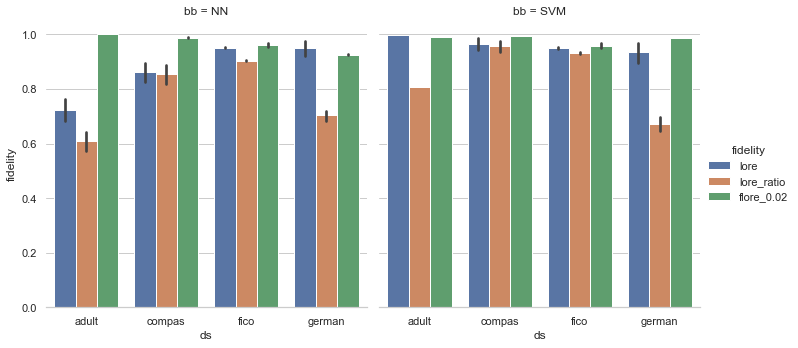

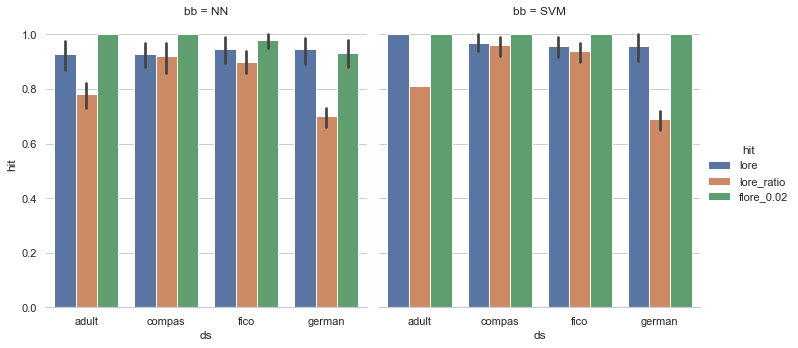

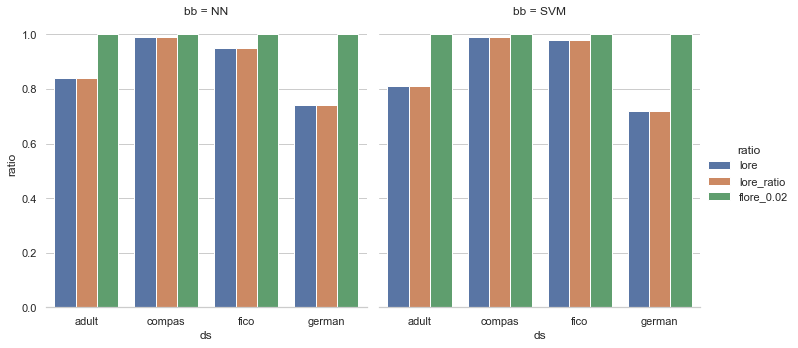

In [21]:

# creating subplots
sns.set_theme(style="whitegrid")
METRICS = ['fidelity', 'hit', 'ratio']
for metric in METRICS:
    # plotting columns
    g = sns.catplot(
        data = df,
        kind = 'bar',
        x='ds', 
        y=metric,
        hue = 'algo',
        col = 'bb',
        hue_order=[
            'lore', 
            'lore_ratio',  
            'flore_0.02', 
            # 'flore_0.04'
            ]

    )


    g.despine(left=True)
    g.legend.set_title(metric)

In [22]:
def plot_overlapped_graph(ds, metric, ax, newax, df):
    sns.set_theme(style="whitegrid", palette='pastel')

    g = sns.barplot(
        ax=ax,
        data = df[df.ds == ds],
        x='bb', 
        y=metric,
        hue = 'algo',
        hue_order=[
            'lore_old', 
            # 'lore_ratio',  
            'FLARE', 
            # 'flore_0.04'
            ]

    )
    g.set(ylabel=None)
    g.set(xlabel=f'Dataset = {ds}')
    sns.despine(left=True)


    sns.set_theme(style="whitegrid")

    j = sns.barplot(
        ax=newax,
        data = df[df.ds == ds],
        x='bb', 
        y=metric,
        hue = 'algo',
        hue_order=[
            # 'lore', 
            'LORE',  
            'FLARE', 
            # 'flore_0.04'
            ],


    )
    j.set(ylabel=None)
    j.set(xlabel=f'Dataset = {ds}')
    sns.despine(left=True)


    # Hide legend from barplot
    if ds != 'fico':
       newax.get_legend().remove() 
    else:
        handles, labels = newax.get_legend_handles_labels()
        newax.legend(handles=handles[0:], labels=labels[0:])
        sns.move_legend(newax, "upper left", bbox_to_anchor=(1, 1))


    ll = g.legend()
    ll.set_visible(False)
    return j

In [23]:
BLACK_BOXES = ['NN', 'SVM']

In [24]:
ndf = df.copy()

In [25]:

ndf.loc[ndf.algo == 'lore', 'algo'] = 'lore_old'
ndf.loc[ndf.algo == 'lore_ratio', 'algo'] = 'LORE'
ndf.loc[ndf.algo == 'flore_0.02', 'algo'] = 'FLARE'

fidelity
hit
ratio


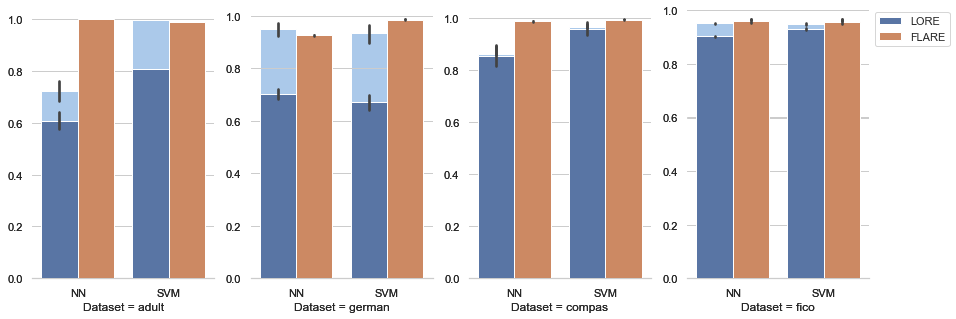

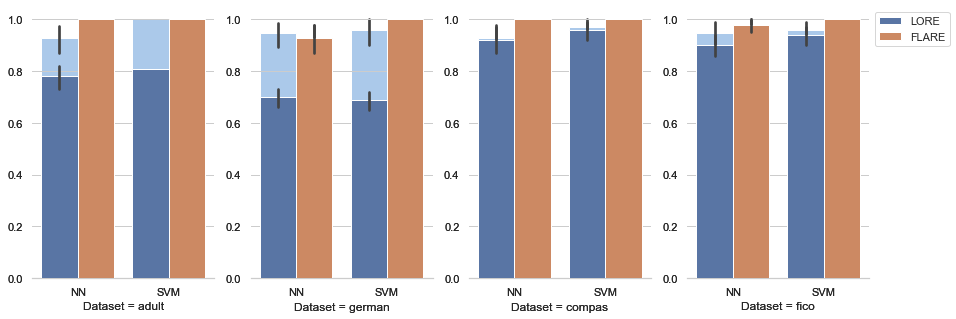

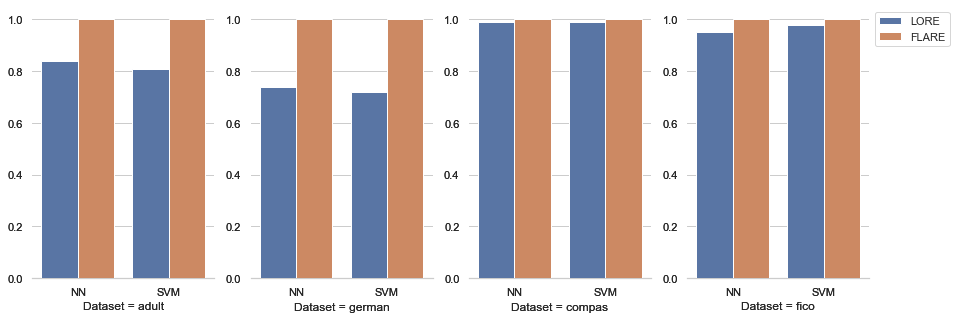

In [27]:
for metric in METRICS:
    fig, axes = plt.subplots(1, 4, figsize=(15, 5))
    # fig.suptitle(metric.capitalize())
    print(metric)
    for ds, ax in zip(DATASETS, axes):
        newax = fig.add_axes(ax.get_position(), frameon=False)
        plot_overlapped_graph(ds, metric, ax, newax, ndf)
    # b = plot_overlapped_graph('SVM', 'fidelity', axes[1])

    # Add legend to figure

    # fig.legend(
    #     [a, b], labels=['lore', 'flore']
    # )